# [G Henry Jacob](https://www.linkedin.com/in/henry-jacob-96872918a/)

### Task #6: Prediction using Decision Tree Algorithm

### Collecting data

In [1]:
# Import libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Create dataframe 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# To see target 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Analysing

In [5]:
df.shape

(150, 4)

There are 150 rows and 4 columns in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Add species type(target) to our dataframe
df['species'] = iris.target

In [8]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
# To see the target names
target = iris.target_names
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# To see species name on dataframe
df['species name'] = df['species'].apply(lambda x: target[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
# To see number of species on each type
df['species name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species name, dtype: int64

There are 3 types of species. Each species contains 50 data.

#### To know more about our data, let's plot a scatter plot for both sepal and petal values to all types of species

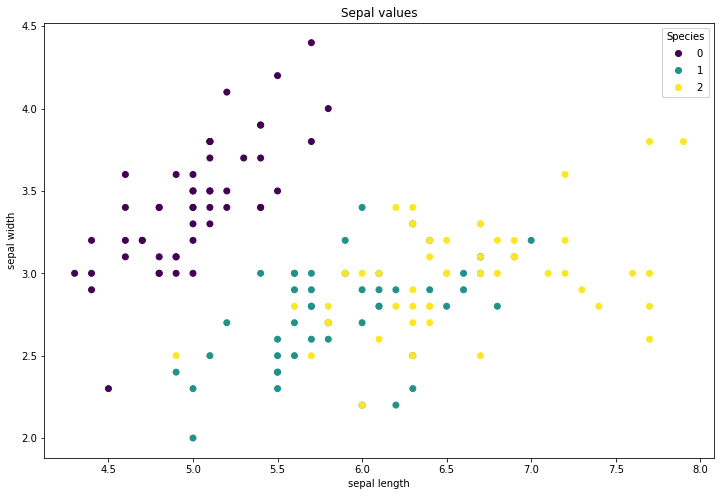

In [12]:
# Based on sepal values
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['species'])
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="upper right", title="Species")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

Species1 & Species2 have more number of same size of sepal length and sepal width. That's why they mixed when we plot their sepal values on scatter plot

---

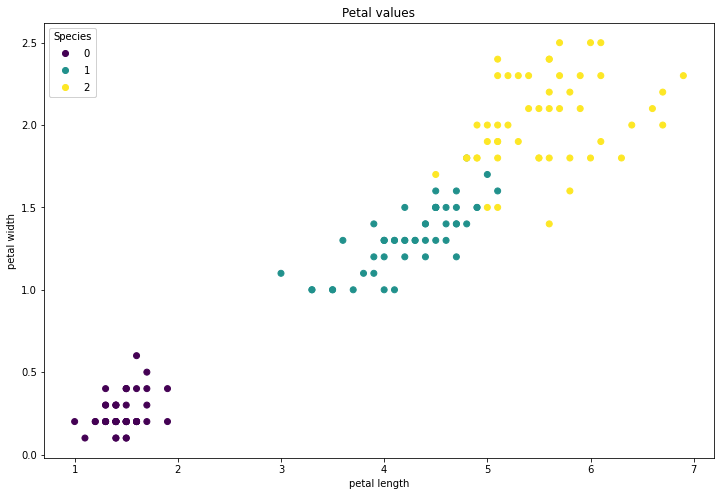

In [13]:
# Based on petal values
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['species'])
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="upper left", title="Species")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

The above figure infers that each type of species has different petal size

---

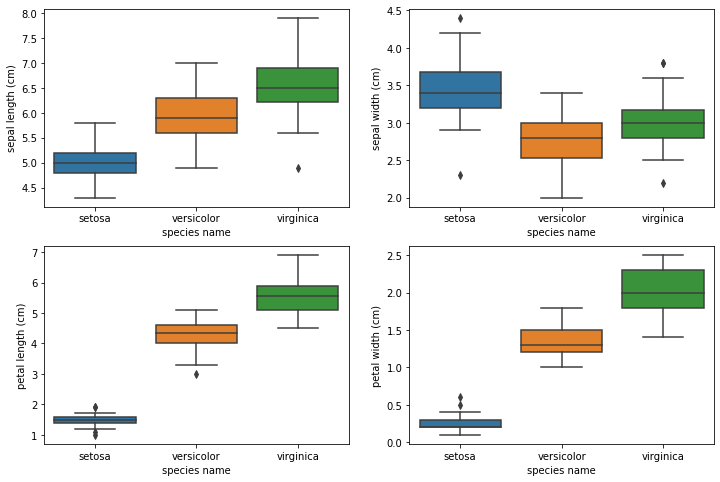

In [14]:
# To see all the values based on species in boxplot 
f, axes = plt.subplots(2, 2)
sns.boxplot(  y="sepal length (cm)", x= "species name", data=df, ax=axes[0, 0])
sns.boxplot(  y="sepal width (cm)", x= "species name", data=df, ax=axes[0, 1])
sns.boxplot(  y="petal length (cm)", x= "species name", data=df,  ax=axes[1, 0])
sns.boxplot(  y="petal width (cm)", x= "species name", data=df, ax=axes[1, 1])
plt.show()

The above figure infers that <br>**setosa < versicolor < virginica** in all values(sepal length, petal length, petal width) **except sepal width**.<br>In size of sepal width setosa is higher than versicolor and virginica

### Data Wrangling

In [15]:
df.drop(['species name'], axis = 1, inplace = True)

In [16]:
# To see null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<AxesSubplot:>

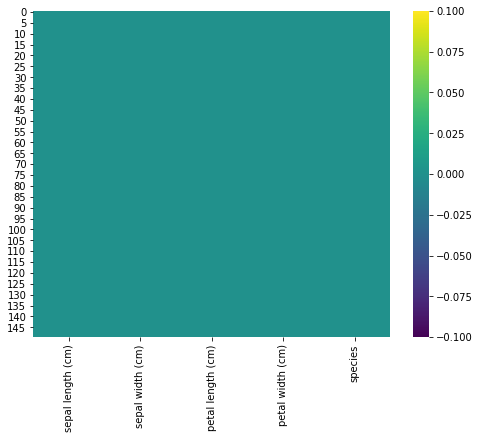

In [17]:
# To see visually
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cmap = 'viridis')

There is no **null values** in the data.

### Training and Testing

In [18]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
X = df.drop(['species'], axis = 1).copy()
y = df['species'].copy()

In [20]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
d_tree = DecisionTreeClassifier()

In [22]:
# fit data into model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# predict output
y_pred = d_tree.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### Accuracy

In [24]:
# import libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [26]:
print(f'Accuracy is {accuracy_score(y_test, y_pred) * 100}')

Accuracy is 97.36842105263158


Model predicts 97% data accurately

In [27]:
# function for plot confusion matrix visually
def print_conf_matrix(confusion_matrix, class_names, figsize = (10, 7), fontsize = 13):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize = figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix must be integer")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

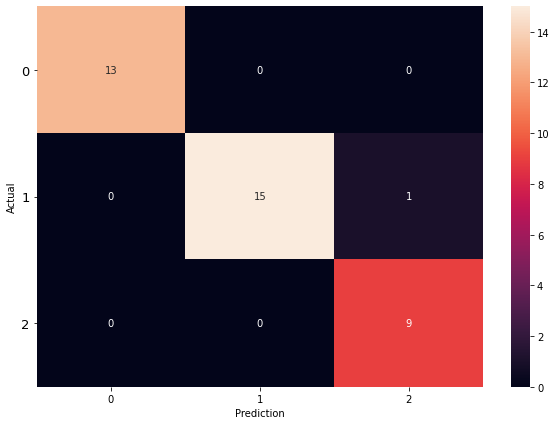

In [28]:
# to see visually
cm = confusion_matrix(y_test, y_pred)
print_conf_matrix(cm, [0, 1, 2])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Tree Visualization

In [30]:
# import library
from sklearn import tree

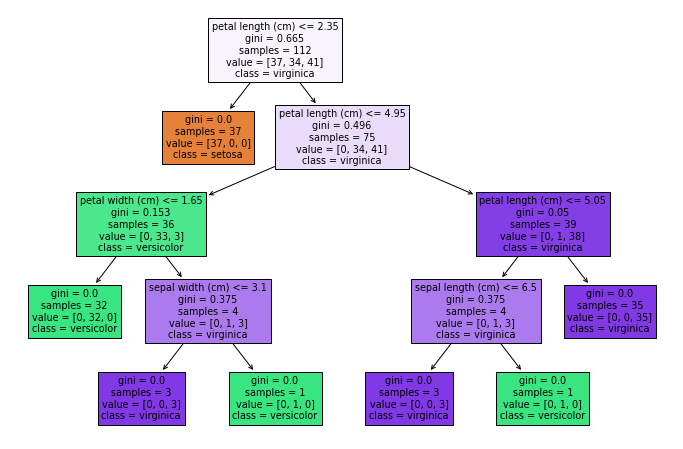

In [33]:
f_n = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
c_n = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(d_tree, feature_names = f_n, class_names = c_n, filled = True);